# 5.5 線性回歸

在統計中，線性回歸是對因變量和一個或多個自變量之間的關係進行建模的線性方法。令X為自變量，Y為因變量。我們將在這兩個變量之間定義一個線性關係，如下所示：
Y = mX + c
 <img align="center" style="padding-right:10px;" src="figures\linear_regression_data_model.gif">
這是您在高中學習的一條線的方程式。m是直線的斜率，c是y截距。今天，我們將使用該方程式來訓練具有給定數據集的模型，並針對任何給定的X值預測Y的值。今天我們的挑戰是確定m和c的值，以使與這些值相對應的線是最佳擬合線或給出最小誤差。

 y = mx + b
 
 


## 損失函數

損失是我們的m和c預測值的誤差。我們的目標是最小化此誤差以獲得m和c的最準確值。

我們將使用均方誤差函數來計算損失。此功能包括三個步驟：

1. 求出給定x的實際y值與預測y值之間的差（y = mx + c）。
2. 平方這個差。
3. 找出X中每個值的平方均值

$E = \frac{1}{N} \sum_{i=1}^{N} (y_i - \bar{y}_i)^2$

此處的yᵢ是實際值，ȳᵢ是預測值。讓我們替換value的值

$E = \frac{1}{N} \sum_{i=1}^{N} (y_i - (\bar{m}x_i + \bar{c}))^2$

因此，我們對誤差求平方並找到均值,上式的$\bar{m} 與 \bar{c}$ 是m與c的估計值。因此，名稱均方誤差。現在我們已經定義了損失函數，讓我們進入有趣的部分-將其最小化並找到m和c。

### 梯度

$∇f(m,c) = (\frac{\partial E}{\partial m}, \frac{\partial E}{\partial c})$

$\frac{\partial E}{\partial m} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))(𝑥_𝑖 ) = -\frac{2}{N}\sum_{i=1}^{N} 𝑥_𝑖 (y_i - \bar{y}_i)$

$\frac{\partial E}{\partial c} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (mx_i + c)) = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \bar{y}_i)$

## 梯度下降算法

讓我們嘗試將梯度下降應用於m和c並逐步解決它：
1. 首先，令m = 0且c =0。令L為我們的學習率。這控制了m的值在每個步驟中變化了多少。為了獲得良好的精度，L可以是一個小值，例如0.0001。

2. 計算損失函數的偏導數相對於m和插頭中的X，Y，M和C的當前值在它以獲得導數值d。

    $D_m = \frac{\partial E}{\partial m} = -\frac{2}{N}\sum_{i=1}^{N} 𝑥_𝑖 (y_i - \bar{y}_i)$

    $D_c = \frac{\partial E}{\partial c} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \bar{y}_i)$
    
3. 現在，我們使用以下公式更新m和c的當前值：  
    $m = m - LD_m$  
    $c = c - LD_c$  
    
4. 我們重複此過程，直到損失函數為一個很小的值，或者理想情況下為0（這意味著0錯誤或100％精度）。我們現在剩下的m和c的值將是最佳值。   


In [1]:
import numpy as np
import matplotlib.pyplot as plt


### 1. 準備測試資料

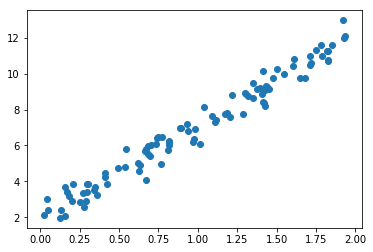

In [4]:
# Preprocessing Input data
m = 5
c = 2
X = 2 * np.random.random(100)
Y = c + m * X+np.random.normal(0,0.5, 100)
plt.scatter(X, Y)
plt.show()

### 2. 建立模型與計算

In [5]:
# Building the model
m = 0
c = 0

L = 0.01  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)



5.016869926561994 2.0769184096109576


### 3. 預測與繪圖

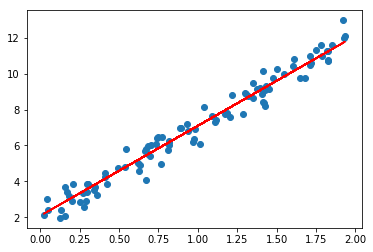

In [6]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.plot(X, Y_pred, color='red')
plt.show()

-4.902142817472418 1.8510674377130119


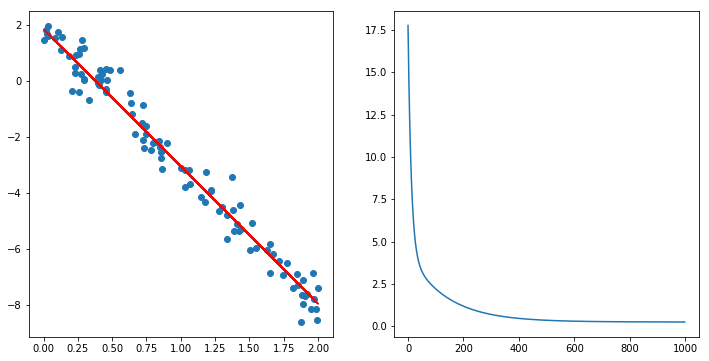

In [26]:
# Preprocessing Input data
m = -5
c = 2
X = 2 * np.random.random(100)
Y = c + m * X+np.random.normal(0,0.5, 100)

# Building the model
m = 0
c = 0

L = 0.01  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
eLog = []
n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    eLog.append(sum((Y - Y_pred)**2/n))
print(m, c)

# Making predictions
Y_pred = m*X + c
fig, ax = plt.subplots( ncols=2,figsize=(12,6))
ax[0].scatter(X, Y) 
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
ax[0].plot(X, Y_pred, color='red')
#plt.show()
ax[1].plot(eLog)                
                

-4.221277179659033 -4.808835604171207 39.04445028903873


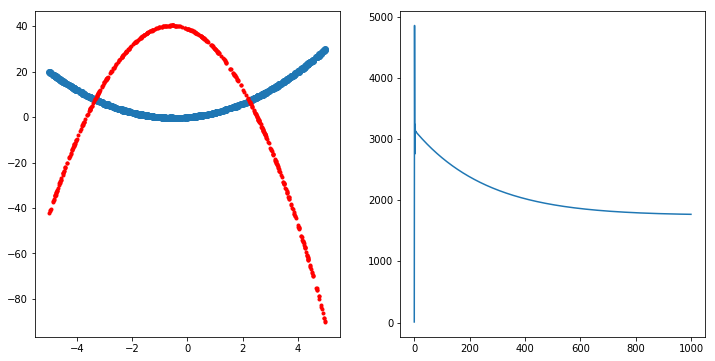

In [44]:
# Preprocessing Input data
a = 1
b = 1
c = 0
X = 10 * np.random.random(500) - 5
Y = a * X**2 + b*X + c + np.random.normal(0,0.1, 500)

# Building the model
a = 1
b = 0
c = 0

L = 0.001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
#eLog = np.array([0])
eLog = []
n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = a * X**2 + b*X + c  # The current predicted value of Y
    D_a = (-2/n) * sum((X**2) * (Y - Y_pred))
    D_b = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    a = m - L * D_a  # Update a
    b = m - L * D_b  # Update b
    c = c - L * D_c  # Update c
    eLog.append(sum((Y - Y_pred)**2/n))
print(a,b, c)

# Making predictions
Y_pred = a * X**2 + b*X + c
fig, ax = plt.subplots( ncols=2,figsize=(12,6))
ax[0].scatter(X, Y) 
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
ax[0].plot(X, Y_pred,'.', color='red')
#plt.show()
ax[1].plot(eLog)                